In [1]:
using DelimitedFiles, HDF5, FileIO
using Plots, Rsvg, LaTeXStrings, AverageShiftedHistograms
using Chemfiles, JUMD
using LinearAlgebra, Statistics
home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pyplot()

"/home/pbarletta/labo/18/lbp/rtdos_log"

### Lee modos, volumen original y  volúmenes NDD. Obtiene VGV

In [2]:
pdb = "4xcp"
# Leo modos
modes_4xcp, evals_4xcp = JUMD.read_ptraj_modes(
    joinpath(home, pdb,  "pca", string("full_modes_", pdb)))

# AAs
aa3 = convert(Int64, length(evals_4xcp))
aa = convert(Int64, aa3 / 3)

# Leo volumen de la traj
trj_vol = convert(Array{Float64, 1}, 
    readdlm(joinpath(home, pdb, "cavidad", string("vol_trj_", pdb)))[:, 3]);

# Leo volúmene del average
vol_avg_4xcp = convert(Float64, readdlm(joinpath(home, pdb,  "ndd", string("vol_avg_", pdb)))[3])

# Leo volúmenes NDD
ndd_out_4xcp = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb,  "ndd", string("out_ndd_", pdb)))[2:end, 2])

# VGV
vgv_4xcp = (ndd_out_4xcp .- vol_avg_4xcp) .* evals_4xcp
vgv_4xcp = vgv_4xcp ./ norm(vgv_4xcp);

### Obtengo proyecciones de PCA sobre trayectoria

In [3]:
dif = h5read(joinpath(rtdos, string("diff_", pdb, ".h5")), "dif")
norm_dif = mapslices(x -> x ./ norm(x), dif,  dims = 1)
nframes = size(dif)[2]

prj_1_4xcp = Array{Float64, 1}(undef, nframes)
prj_2_4xcp = Array{Float64, 1}(undef, nframes)
prj_3_4xcp = Array{Float64, 1}(undef, nframes)

for i = 1:nframes
    prj_1_4xcp[i] = dot(norm_dif[:, i], modes_4xcp[:, 1])
    prj_2_4xcp[i] = dot(norm_dif[:, i], modes_4xcp[:, 2])
    prj_3_4xcp[i] = dot(norm_dif[:, i], modes_4xcp[:, 3])
end

# Smooth
smooth_prj_1_4xcp = [ mean(prj_1_4xcp[i:i+9]) for i = 1:10:length(prj_1_4xcp)-9 ]
smooth_prj_2_4xcp = [ mean(prj_2_4xcp[i:i+9]) for i = 1:10:length(prj_2_4xcp)-9 ]
smooth_prj_3_4xcp = [ mean(prj_3_4xcp[i:i+9]) for i = 1:10:length(prj_3_4xcp)-9 ];

# Energía de poblaciones

In [ ]:
# Leo modos
modes_0, evals_0 = JUMD.read_ptraj_modes(joinpath(home, pdb, "poblaciones", "pca", string("full_modes_", pdb, "_0")))
modes_1, evals_1 = JUMD.read_ptraj_modes(joinpath(home, pdb, "poblaciones", "pca", string("full_modes_", pdb, "_1")))
modes_2, evals_2 = JUMD.read_ptraj_modes(joinpath(home, pdb, "poblaciones", "pca", string("full_modes_", pdb, "_2")))

# Leo volúmenes originales
vol_avg_0 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones", "ndd", "0", string("vol_avg_", pdb, "_0")))[2])
vol_avg_1 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones", "ndd", "1", string("vol_avg_", pdb, "_1")))[2])
vol_avg_2 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones", "ndd", "2", string("vol_avg_", pdb, "_2")))[2])

# Leo volúmenes NDD
ndd_out_0 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "0", string("out_ndd_", pdb, "_0")))[2:end, 2])
# VGV
vgv_0 = ndd_out_0 .- vol_avg_0
vgv_0 = vgv_0 ./ norm(vgv_0);

# Leo volúmenes NDD
ndd_out_1 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "1", string("out_ndd_", pdb, "_1")))[2:end, 2])
# VGV
vgv_1 = ndd_out_1 .- vol_avg_1
vgv_1 = vgv_1 ./ norm(vgv_1);

# Leo volúmenes NDD
ndd_out_2 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "2", string("out_ndd_", pdb, "_2")))[2:end, 2])
# VGV
vgv_2 = ndd_out_2 .- vol_avg_2
vgv_2 = vgv_2 ./ norm(vgv_2);

In [ ]:
points = 21
maxi = floor(points / 2)
mini = -maxi
RT = 0.693

E_0 = Array{Float64,1}(points)
i = 0
for d = mini:maxi
    i+=1
    E_0[i] = JUMD.energia_gdte(evals_0, vgv_0, d * 5E-1)
end

points = 21
maxi = floor(points / 2)
mini = -maxi
RT = 0.693

E_1 = Array{Float64,1}(points)
i = 0
for d = mini:maxi
    i+=1
    E_1[i] = JUMD.energia_gdte(evals_1, vgv_1, d * 5E-1)
end

points = 21
maxi = floor(points / 2)
mini = -maxi
RT = 0.693

E_2 = Array{Float64,1}(points)
i = 0
for d = mini:maxi
    i+=1
    E_2[i] = JUMD.energia_gdte(evals_2, vgv_2, d * 5E-1)
end

In [ ]:
plt_u = plot(collect(-5:.5:5), E_0,
    yaxis = "U", xaxis = "Displacement", title = "Energia",
    xticks = -5:1:5,
    ylims = (0, 1.),
    lab = "E_0", size = (750, 400))
plot!(plt_u, collect(-5:.5:5), E_1, lab = "E_1")
plot!(plt_u, collect(-5:.5:5), E_2, lab = "E_2")
hline!(plt_u, [RT], lab = "RT")

#### Leo los vectores diferencia y los normalizo
#### Obtengo las proyecciónes de vectores diferencia sobre los 1eros PCA

## Separo las poblaciones según PCA

cuentas = 125
in_bins = collect(-1:.025:1)
his_ind_12, his_12 = JUMD.MatHisInd2D(prj_1_4xcp, prj_2_4xcp, in_bins, in_bins);
his_ind_13, his_13 = JUMD.MatHisInd2D(prj_1_4xcp, prj_3_4xcp, in_bins, in_bins);
his_ind_23, his_23 = JUMD.MatHisInd2D(prj_2_4xcp, prj_3_4xcp, in_bins, in_bins);

msk_12 = his_12 .> cuentas
main_his_12 = his_12[msk_12]
main_his_ind_12 = his_ind_12[msk_12];

msk_13 = his_13 .> cuentas
main_his_13 = his_13[msk_13]
main_his_ind_13 = his_ind_13[msk_13];

msk_23 = his_23 .> cuentas
main_his_23 = his_23[msk_23]
main_his_ind_23 = his_ind_23[msk_23];

# 1
spy(msk_12[15:50, 20:32])
# 2
spy(msk_12[69:80, 25:55])
# 3
spy(msk_12[25:48, 70:80])

idx_vol1 = collect(Iterators.flatten(his_ind_12[15:50, 20:32]))
idx_vol2 = collect(Iterators.flatten(his_ind_12[69:80, 25:55]))
idx_vol3 = collect(Iterators.flatten(his_ind_12[25:48, 70:80]));

# Indices de poblaciones
writedlm(joinpath(rtdos, string(pdb, "_idx_vol1")), idx_vol1)
writedlm(joinpath(rtdos, string(pdb, "_idx_vol2")), idx_vol2)
writedlm(joinpath(rtdos, string(pdb, "_idx_vol3")), idx_vol3)

# Preparo
in_trj = Trajectory(joinpath(home, pdb, "pca", string("full_avgfit_", pdb, ".nc")))
nframes = convert(Int64, nsteps(in_trj))
close(in_trj)

# Uso esto p/ dividir las trayectorias a escribir en 10 partes y q
# no me llenen la memoria
function filter_trj(indices::Array{Int64, 1},
    in_filename::AbstractString, ou_filename::AbstractString)
    # Divide la corrida en 10 secciones
    idx_ = convert(Int64, ceil(length(indices) / 10))
    secc = [ collect(1:idx_:length(indices)) ; length(indices) ]
    secc[end] += 1
    
    ou_trj = Trajectory(ou_filename, 'w')
    for j in 1:length(secc) - 1
        in_trj = Trajectory(in_filename)
        for i in secc[j]:secc[j+1]-1
            in_frm = read_step(in_trj, indices[i] - 1)
            write(ou_trj, in_frm)
        end
        close(in_trj)
        println(j)
        GC.gc()
    end
    close(ou_trj)
end

filter_trj(idx_vol1, joinpath(home, pdb, "pca", string("full_avgfit_", pdb, ".nc")),
    joinpath(home, pdb, string("poblaciones/vol1_", pdb, ".nc")))
filter_trj(idx_vol2, joinpath(home, pdb, "pca", string("full_avgfit_", pdb, ".nc")),
    joinpath(home, pdb, string("poblaciones/vol2_", pdb, ".nc")))
filter_trj(idx_vol3, joinpath(home, pdb, "pca", string("full_avgfit_", pdb, ".nc")),
    joinpath(home, pdb, string("poblaciones/vol3_", pdb, ".nc")))

In [6]:
idx_vol1 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol1")))[:, 1])
idx_vol2 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol2")))[:, 1])
idx_vol3 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol3")))[:, 1])

# Estiro el volumen 
full_trj_vol = Array{Float64}(undef, length(trj_vol)*10)
for i = 1:length(trj_vol)
    k = (i-1) * 10 + 1
    full_trj_vol[k:k+9] =  fill(trj_vol[i], 10)
end

trj_vol1 = full_trj_vol[idx_vol1]
trj_vol2 = full_trj_vol[idx_vol2]
trj_vol3 = full_trj_vol[idx_vol3];

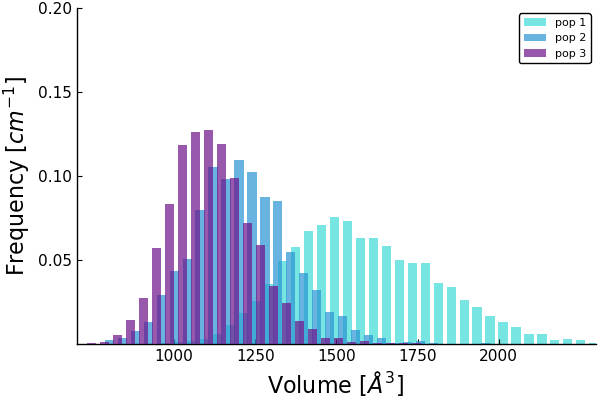

In [59]:
st = 40
bw = 28
fa = .7
bin_range = 700:st:2300
bin_vol = collect(bin_range)

# Histograma ponderado

wgh_vol = fill(1.0, length(idx_vol1))
bin_vol1_4xcp, his_vol1_4xcp = JUMD.WeightedHist(trj_vol1, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(idx_vol2))
bin_vol2_4xcp, his_vol2_4xcp = JUMD.WeightedHist(trj_vol2, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(idx_vol3))
bin_vol3_4xcp, his_vol3_4xcp = JUMD.WeightedHist(trj_vol3, bin_vol, wgh_vol, true, false)

plt_his_vols = bar(bin_vol1_4xcp .+ st/3, his_vol1_4xcp, label = "pop 1", fillalpha = fa,
    bar_width = bw, fillcolor = colorant"#3DDAD7",
    
    xticks = 1E3:250:2E3, yticks = .05:.05:.2,
    xlims = (700, 2300), ylims = (0, .2),
    linecolor = false, legend = (.9, .95),
    
    grid = false, guidefont = font(16, "cursive"), tickfont = font(11, "cursive"),
    yaxis = L"Frequency $[cm^{-1}]$", xaxis = L"Volume $[\AA^3]$ ")

bar!(bin_vol2_4xcp, his_vol2_4xcp, label = "pop 2", fillalpha = fa,
    bar_width = bw, fillcolor = colorant"#2A93D5", linecolor = false)

bar!(bin_vol3_4xcp .- st/3, his_vol3_4xcp, label = "pop 3", fillalpha = fa,
    bar_width = bw, fillcolor = colorant"#6d138b", linecolor = false)

In [52]:
savefig(plt_his_vols, joinpath(rtdos, "papel", "3", string("3_VolHis_bars_", pdb, ".svg")))

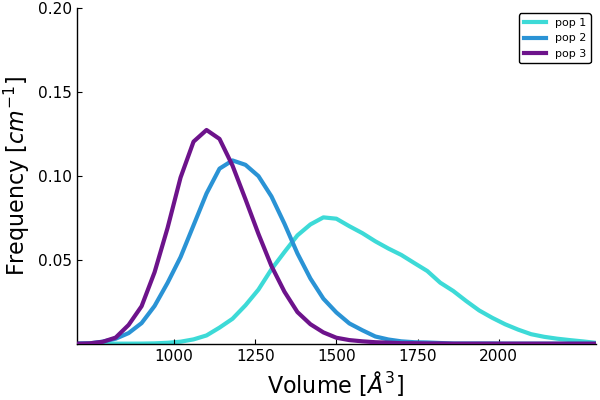

In [60]:
# Suavizado
m_ = 2
ash_vol_1 = ash(trj_vol1, rng = bin_range, m = m_, kernel = AverageShiftedHistograms.Kernels.gaussian)
xy_ash_vol_1 = xy(ash_vol_1)
xy_ash_vol_1[2][:] = xy_ash_vol_1[2] .*  (maximum(his_vol1_4xcp) / maximum(xy_ash_vol_1[2]))

ash_vol_2 = ash(trj_vol2, rng = bin_range, m = m_, kernel = AverageShiftedHistograms.Kernels.gaussian)
xy_ash_vol_2 = xy(ash_vol_2)
xy_ash_vol_2[2][:] = xy_ash_vol_2[2] .*  (maximum(his_vol2_4xcp) / maximum(xy_ash_vol_2[2]))

ash_vol_3 = ash(trj_vol3, rng = bin_range, m = m_, kernel = AverageShiftedHistograms.Kernels.gaussian)
xy_ash_vol_3 = xy(ash_vol_3)
xy_ash_vol_3[2][:] = xy_ash_vol_3[2] .*  (maximum(his_vol3_4xcp) / maximum(xy_ash_vol_3[2]))

plt_his_vols = plot(xy_ash_vol_1, linecolor = colorant"#3DDAD7",
    label = "pop 1", linewidth = 3, 
    
    xticks = 1E3:250:2E3, yticks = .05:.05:.2,
    xlims = (700, 2300), ylims = (0, .2),
    legend = (.9, .95),
    grid = false, guidefont = font(16, "cursive"), tickfont = font(11, "cursive"),
    yaxis = L"Frequency $[cm^{-1}]$", xaxis = L"Volume $[\AA^3]$ ")

plot!(xy_ash_vol_2, linecolor = colorant"#2A93D5", label = "pop 2", linewidth = 3)
plot!(xy_ash_vol_3, linecolor = colorant"#6d138b", label = "pop 3", linewidth = 3)

In [61]:
savefig(plt_his_vols, joinpath(rtdos, "papel", "3", string("3_VolHis_", pdb, ".svg")))

In [7]:
hcat([ mean(trj_vol1) ; mean(trj_vol2) ; mean(trj_vol3) ],
    [ std(trj_vol1) ; std(trj_vol2) ; std(trj_vol3) ])

3×2 Array{Float64,2}:
 1567.64  222.059
 1211.21  150.376
 1130.05  125.841

In [14]:
trj_vol1_smooth = [ mean(trj_vol1[i:i+10]) for i = 1:10:length(trj_vol1)-10 ]
trj_vol2_smooth = [ mean(trj_vol2[i:i+10]) for i = 1:10:length(trj_vol2)-10 ]
trj_vol3_smooth = [ mean(trj_vol3[i:i+10]) for i = 1:10:length(trj_vol3)-10 ]

idx_vol1_smooth = [ idx_vol1[i] for i = 1:10:length(idx_vol1)-10 ]
idx_vol2_smooth = [ idx_vol2[i] for i = 1:10:length(idx_vol2)-10 ]
idx_vol3_smooth = [ idx_vol3[i] for i = 1:10:length(idx_vol3)-10 ];

grupos = [ fill("pop 1", length(idx_vol1_smooth)) ; fill("pop 2", length(idx_vol2_smooth)) ; 
    fill("pop 3", length(idx_vol3_smooth)) ];

In [48]:
plt_vol_pop = scatter(idx_vol1_smooth, trj_vol1_smooth,  label = "pop 1",
    markersize = 2., markeralpha = .3, markerstrokewidth = .1, seriescolor = colorant"##3DDAD7",
    
    grid = false, guidefont = font(16, "cursive"), tickfont = font(11, "cursive"),
    yaxis = L"Frequency $[cm^{-1}]$", xaxis = L"Volume $[\AA^3]$ ",
    legend = (.9, .95))

scatter!(idx_vol2_smooth, trj_vol2_smooth, label = "pop 2",
    markersize = 2., markeralpha = .3, markerstrokewidth = .1, seriescolor = colorant"#2A93D5")

scatter!(idx_vol3_smooth, trj_vol3_smooth, label = "pop 3",
    markersize = 2., markeralpha = .3, markerstrokewidth = .1, seriescolor = colorant"#6d138b");

In [47]:
savefig(plt_vol_pop, joinpath(rtdos, "papel", "3", string("3_Vol_", pdb, ".svg")))

### RMSD de lig en poblaciones prot. Guardo el frame más similar al avg

rmsd_vol1 = convert(Array{Float64, 1}, readdlm(joinpath(
            home, pdb, "poblaciones", "intra", string("rmsd_vol1")))[2:end, 2])
rmsd_vol2 = convert(Array{Float64, 1}, readdlm(joinpath(
                home, pdb, "poblaciones", "intra", string("rmsd_vol2")))[2:end, 2])
rmsd_vol3 = convert(Array{Float64, 1}, readdlm(joinpath(
                    home, pdb, "poblaciones", "intra", string("rmsd_vol3")))[2:end, 2]);

### Volume 1
trj_in = Trajectory(joinpath(home, pdb, "poblaciones", string("vol1_", pdb, ".nc")))
in_top_trj = Trajectory(joinpath(home, pdb, "poblaciones", "intra", string("avg_vol1_", pdb, ".pdb")))
in_top_frm = read(in_top_trj)
in_top = Topology(in_top_frm)
in_frm = read_step(trj_in, argmin(rmsd_vol1) - 1)
set_topology!(in_frm, in_top)
trj_out = Trajectory(joinpath(home, pdb, "poblaciones", "intra", string("top_vol1_", pdb, ".pdb")), 'w')
write(trj_out, in_frm)
close(trj_out)
close(trj_in)

### Volume 2
trj_in = Trajectory(joinpath(home, pdb, "poblaciones", string("vol2_", pdb, ".nc")))
in_top_trj = Trajectory(joinpath(home, pdb, "poblaciones", "intra", string("avg_vol2_", pdb, ".pdb")))
in_top_frm = read(in_top_trj)
in_top = Topology(in_top_frm)
in_frm = read_step(trj_in, argmin(rmsd_vol2) - 1)
set_topology!(in_frm, in_top)
trj_out = Trajectory(joinpath(home, pdb, "poblaciones", "intra", string("top_vol2_", pdb, ".pdb")), 'w')
write(trj_out, in_frm)
close(trj_out)
close(trj_in)

### Volume 3
trj_in = Trajectory(joinpath(home, pdb, "poblaciones", string("vol3_", pdb, ".nc")))
in_top_trj = Trajectory(joinpath(home, pdb, "poblaciones", "intra", string("avg_vol3_", pdb, ".pdb")))
in_top_frm = read(in_top_trj)
in_top = Topology(in_top_frm)
in_frm = read_step(trj_in, argmin(rmsd_vol3) - 1)
set_topology!(in_frm, in_top)
trj_out = Trajectory(joinpath(home, pdb, "poblaciones", "intra", string("top_vol3_", pdb, ".pdb")), 'w')
write(trj_out, in_frm)
close(trj_out)
close(trj_in)